In [1]:
using Pkg
using Test

Pkg.activate("../../")

using Catlab
using Catlab.Doctrines
using Catlab.Syntax

using Catlab.Graphics
using Catlab.Graphics.TikZ

using Catlab.WiringDiagrams


Activating environment at `~/.julia/dev/Catlab/Project.toml`


In [2]:
wd(x) = to_wiring_diagram(x)

display(x) = to_graphviz(add_junctions!(wd(x)), direction=:horizontal)

display (generic function with 1 method)

In [3]:
A, B, C = Ob(FreeBicategoryRelations, :A, :B, :C)
f, g, h = Hom(:f, A, B), Hom(:g, B, A), Hom(:h, B⊗A, C)


(f, g, h)

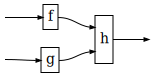

In [4]:
display((f⊗g⋅h))

In [5]:
display(dagger(h))

MethodError: MethodError: no method matching dagger(::WiringDiagram)
Closest candidates are:
  dagger(!Matched::Catlab.Doctrines.DaggerCategory.Hom) at none:0
  dagger(!Matched::Catlab.Doctrines.FreeDaggerCategory.Hom) at /Users/jfairbanks6/.julia/dev/Catlab/src/doctrines/Monoidal.jl:358
  dagger(!Matched::Catlab.Doctrines.DaggerCompactCategory.Hom) at none:0
  ...

In [6]:
dagger((h⊗f)⋅(id(B)⊗(mmerge(A))))

SyntaxDomainError: Domain error in term constructor compose(otimes(h,f),otimes(id(B),mmerge(A)))

In [7]:
dagger(h⊗f)⋅(id(B)⊗mmerge(A))⋅h

compose(otimes(dagger(h),dagger(f)),otimes(id(B),mmerge(A)),h)

In [8]:
dagger(h⊗f)⋅(id(B)⊗mmerge(A))⋅h |> wd

MethodError: MethodError: no method matching dagger(::WiringDiagram)
Closest candidates are:
  dagger(!Matched::Catlab.Doctrines.DaggerCategory.Hom) at none:0
  dagger(!Matched::Catlab.Doctrines.FreeDaggerCategory.Hom) at /Users/jfairbanks6/.julia/dev/Catlab/src/doctrines/Monoidal.jl:358
  dagger(!Matched::Catlab.Doctrines.DaggerCompactCategory.Hom) at none:0
  ...

In [9]:
Catlab.dagger

UndefVarError: UndefVarError: dagger not defined

In [10]:
foo = dagger(h⊗f)⋅(id(B)⊗mmerge(A))⋅h

compose(otimes(dagger(h),dagger(f)),otimes(id(B),mmerge(A)),h)

In [11]:
dagger(foo)

compose(dagger(h),otimes(id(B),dagger(mmerge(A))),otimes(h,f))

In [12]:
import Catlab.WiringDiagrams: AbstractBox, Box
import Catlab.Doctrines.dagger

In [13]:
struct DaggerBox{T<: AbstractBox}
    box::T
end

dagger(b::Box) = DaggerBox(b)
dagger(b::DaggerBox) = b.box

dagger (generic function with 10 methods)

In [14]:
functor((String, Vector{String}), foo,
    terms = Dict(
      :Ob => expr -> first(expr),
      :Hom => expr -> singleton_diagram(Box(expr)),
    )
)

MethodError: MethodError: no method matching dagger(::Type{Array{String,1}}, ::WiringDiagram)

In [15]:
using LinearAlgebra
import LinearAlgebra: adjoint
import Catlab.Doctrines: otimes, compose
struct DirectSumMatrix{T}
    data::T
end

Doctrines.compose(a::DirectSumMatrix, b::DirectSumMatrix) = DirectSumMatrix(a.data*b.data)
otimes(f::DirectSumMatrix,g::DirectSumMatrix) = begin
    a,b = f.data, g.data
    T = eltype(a)
    n,m = size(a)
    k,l = size(b)
    DirectSumMatrix(vcat(hcat(a, zeros(T, n,l)), hcat(zeros(T, k,m),b)))
end
function otimes(f::DirectSumMatrix{D}, g::DirectSumMatrix{E}) where {D<:Diagonal,E<:Diagonal}
    @show typeof(f.data), typeof(g.data)
    DirectSumMatrix(Diagonal(vcat(f.data.diag, g.data.diag)))
end
#import LinearAlgebra.SparseMatrixCSC
#otimes(f::DirectSumMatrix{A}, g::DirectSumMatrix{D}) where {A<:Array, D<:Diagonal} = otimes(f, DirectSumMatrix(Matrix(g.data)))
#otimes(f::DirectSumMatrix{A}, g::DirectSumMatrix{D}) where {A<:LinearAlgebra.SparseMatrixCSC, D<:Diagonal} = otimes(f, DirectSumMatrix(Matrix(g.data)))


dagger(f::DirectSumMatrix) = DirectSumMatrix(f.data')
adjoint(f::DirectSumMatrix) = dagger(f)

adjoint (generic function with 49 methods)

In [16]:
@test otimes(DirectSumMatrix(ones(Int, 1,1)), DirectSumMatrix(2ones(1,1))).data == [1 0; 0 2]

Test Passed

In [17]:
import Base: ^
R = Ob(FreeBicategoryRelations, Symbol("\\mathbb{R}"))
typeof(R)

Catlab.Doctrines.FreeBicategoryRelations.Ob{:generator}

In [18]:
^(x::FreeBicategoryRelations.Ob{:generator}, n::Int) = otimes([x for i in 1:n]...)
R^2

otimes(\mathbb{R},\mathbb{R})

In [19]:
R^4

otimes(\mathbb{R},\mathbb{R},\mathbb{R},\mathbb{R})

In [20]:
f, g, h= Hom(:f, R^2, R^2), Hom(:g, R^2, R^2), Hom(:h, R^4, R^2)

(f, g, h)

In [21]:
f

f

In [22]:
matcopy = DirectSumMatrix(Matrix([1 1]))
matg = DirectSumMatrix([1 3;1 1])
matf = DirectSumMatrix([1 1;-1 1])
mat_h = DirectSumMatrix([1 -1 1 -1; -1 1 -1 1; -1 -1 1 1; 1 1 -1 -1])
matcopier(i) = (DirectSumMatrix∘Matrix∘hcat)([I(i) for j in 1:i]...)
F(ex) = begin
    functor((Vector, DirectSumMatrix), ex, generators=Dict(
    f=>matf,
    g=>matg,
    mcopy(R)=>matcopy))
end

F (generic function with 1 method)

In [23]:
@test F(f⋅g).data == matf.data*matg.data
@test F(f⊗g).data == otimes(matf,matg).data
@test F(dagger(f)).data  == matf.data'
@test F(dagger(g)).data  == matg.data'

Test Passed

In [24]:
mcopy(R^2)⋅(f⊗g)

compose(mcopy(otimes(\mathbb{R},\mathbb{R})),otimes(f,g))

F(mcopy(R^2)⋅(f⊗g))

mcopy(R).type_args

In [25]:
F(ex) = begin
    d = Dict(f=>matf, g=>matg)
    functor((Vector, DirectSumMatrix), ex, generators=d, terms=Dict(
        #:generator=>x->d[x],
        :mcopy=>x->begin println(x.args[1].args |> length); matcopy end,
        :braid=>x->DirectSumMatrix([0 1; 1 0]),
        :id=>x->DirectSumMatrix(Diagonal(ones(x.args[1].args|>length)))
        )
    )
end
head(mcopy(R))

:mcopy

In [26]:
F(mcopy(R))

1


DirectSumMatrix{Array{Int64,2}}([1 1])

In [27]:
F(mcopy(R^2))

2


DirectSumMatrix{Array{Int64,2}}([1 1])

In [28]:
mcopy(R^2)

mcopy(otimes(\mathbb{R},\mathbb{R}))

#mcopy(R^2) = 
F((mcopy(R)⊗mcopy(R))⋅(id(R)⊗braid(R,R)⊗id(R)))

In [29]:
@test F(braid(R,R)).data == [0 1; 1 0]
@test F(braid(R,R)⊗braid(R,R)).data == [ 
    0  1  0  0;
    1  0  0  0;
    0  0  0  1;
    0  0  1  0]
@test F(braid(R,R)⋅braid(R,R)).data == I
@test F(braid(R,R)⊗id(R)).data |> Matrix{Int} == [0 1 0; 1 0 0; 0 0 1]
@test F(braid(R,R)⊗(id(R)⊗id(R))).data |> Matrix{Int} == [0 1 0 0; 1 0 0 0; 0 0 1 0; 0 0 0 1]
@test F(id(R)⊗id(R)).data == I(2)

(typeof(f.data), typeof(g.data)) = (Diagonal{Float64,Array{Float64,1}}, Diagonal{Float64,Array{Float64,1}})


Test Passed

In [30]:
@testset "Diagonals" begin 
    for i in 2:5
        @test F(otimes([id(R) for j in 1:i]...)).data == I(i)
        @test F(id(R^i)).data == I(i)
    end
end

(typeof(f.data), typeof(g.data)) = (Diagonal{Float64,Array{Float64,1}}, Diagonal{Float64,Array{Float64,1}})
(typeof(f.data), typeof(g.data)) = (Diagonal{Float64,Array{Float64,1}}, Diagonal{Float64,Array{Float64,1}})
(typeof(f.data), typeof(g.data)) = (Diagonal{Float64,Array{Float64,1}}, Diagonal{Float64,Array{Float64,1}})
(typeof(f.data), typeof(g.data)) = (Diagonal{Float64,Array{Float64,1}}, Diagonal{Float64,Array{Float64,1}})
(typeof(f.data), typeof(g.data)) = (Diagonal{Float64,Array{Float64,1}}, Diagonal{Float64,Array{Float64,1}})
(typeof(f.data), typeof(g.data)) = (Diagonal{Float64,Array{Float64,1}}, Diagonal{Float64,Array{Float64,1}})
(typeof(f.data), typeof(g.data)) = (Diagonal{Float64,Array{Float64,1}}, Diagonal{Float64,Array{Float64,1}})
(typeof(f.data), typeof(g.data)) = (Diagonal{Float64,Array{Float64,1}}, Diagonal{Float64,Array{Float64,1}})
(typeof(f.data), typeof(g.data)) = (Diagonal{Float64,Array{Float64,1}}, Diagonal{Float64,Array{Float64,1}})
(typeof(f.data), typeof(g.da

Test.DefaultTestSet("Diagonals", Any[], 8, false)

In [31]:
mcopy(R)⊗mcopy(R)

otimes(mcopy(\mathbb{R}),mcopy(\mathbb{R}))

In [32]:
[2 3]*F(mcopy(R)⊗mcopy(R)⋅otimes(id(R), braid(R,R), id(R))).data

1
1


1×4 Array{Float64,2}:
 2.0  3.0  2.0  3.0

In [33]:
F(ex) = begin
    d = Dict(f=>matf, g=>matg, h=>mat_h)
    functor((Vector, DirectSumMatrix), ex, generators=d, terms=Dict(
        :mcopy=>x->begin i=length(x.args[1].args); i==1 ? matcopy : matcopier(i); end, 
        :mmerge=>x->begin i=length(x.args[1].args); i==1 ? matcopy' : matcopier(i)'; end,
        :braid=>x->DirectSumMatrix([0 1; 1 0]),
        :id=>x->DirectSumMatrix(Diagonal(ones(x.args[1].args|>length)))
        )
    )
end

F (generic function with 1 method)

In [34]:
@show F(f⊗g).data
@show F(f⊗g⋅h).data

(F(f ⊗ g)).data = [1 1 0 0; -1 1 0 0; 0 0 1 3; 0 0 1 1]
(F((f ⊗ g) ⋅ h)).data = [0 0 0 0; -2 2 -2 2; 2 2 -2 -2; 0 0 0 0]


4×4 Array{Int64,2}:
  0  0   0   0
 -2  2  -2   2
  2  2  -2  -2
  0  0   0   0

In [35]:
@test F(id(R^4)⋅h).data == mat_h.data

Test Passed

In [36]:
F(h)

DirectSumMatrix{Array{Int64,2}}([1 -1 1 -1; -1 1 -1 1; -1 -1 1 1; 1 1 -1 -1])

In [37]:
mat_h.data' * otimes(matf, matg).data'

4×4 Array{Int64,2}:
 0  -2   2  0
 0   2   2  0
 0  -2  -2  0
 0   2  -2  0

In [38]:
mat_h.data'

4×4 Adjoint{Int64,Array{Int64,2}}:
  1  -1  -1   1
 -1   1  -1   1
  1  -1   1  -1
 -1   1   1  -1

In [39]:
@test F(dagger(h)).data == mat_h.data'
@test F(dagger(f⊗g)).data == F(f⊗g).data'
@test F(dagger((f⊗g)⋅h)).data == F(f⊗g⋅h).data'

Test Passed

In [40]:
delete(R)

delete(\mathbb{R})

In [41]:
F(mcopy(R)).data

1×2 Array{Int64,2}:
 1  1

In [42]:
F(mcopy(R^2)).data

2×4 Array{Bool,2}:
 1  0  1  0
 0  1  0  1

In [43]:
F(mcopy(R^3)).data

3×9 Array{Bool,2}:
 1  0  0  1  0  0  1  0  0
 0  1  0  0  1  0  0  1  0
 0  0  1  0  0  1  0  0  1

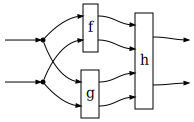

In [44]:
ex = (mcopy(R)⊗mcopy(R))⋅(id(R)⊗braid(R,R)⊗id(R))⋅(f⊗g)⋅h
display(ex)

In [45]:
F(ex).data

2×4 Array{Float64,2}:
  2.0  2.0  -2.0  -2.0
 -2.0  2.0  -2.0   2.0

In [46]:
@test head(create(R)) == :create

Test Passed

In [47]:
mat_h.data

4×4 Array{Int64,2}:
  1  -1   1  -1
 -1   1  -1   1
 -1  -1   1   1
  1   1  -1  -1

In [48]:
[2]*F(mcopy(R)).data

1×2 Array{Int64,2}:
 2  2

struct Nullity
    dim::Int
end

In [49]:
mmerge(R^2)

mmerge(otimes(\mathbb{R},\mathbb{R}))

In [50]:
@test [1,2,3,4]'F(mmerge(R)⊗mmerge(R)).data == [3,7]'
@test [1,2,3,4]'F((mmerge(R)⊗mmerge(R))⋅mmerge(R)).data == [10]'

Test Passed

In [51]:
mcopy(R)⋅f⋅mmerge(R)

compose(mcopy(\mathbb{R}),f,mmerge(\mathbb{R}))

In [52]:
F(mcopy(R)⋅f⋅mmerge(R))

DirectSumMatrix{Array{Int64,2}}([2])

In [53]:
(create(R)⊗create(R))⋅f

compose(otimes(create(\mathbb{R}),create(\mathbb{R})),f)

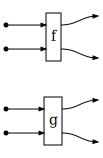

In [54]:
((create(R)⊗create(R))⋅f)⊗((create(R)⊗create(R))⋅g) |> display

In [55]:
^(f::Catlab.Doctrines.FreeBicategoryRelations.Hom, n::Int64) = foldl(otimes, [f for i in 1:n])


^ (generic function with 66 methods)

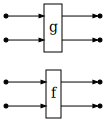

In [56]:
(((create(R)^2)⋅f)⊗((create(R)^2)⋅g))⋅(delete(R)^4) |> display

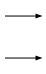

In [57]:
(mcopy(R)^2) ⋅ otimes(delete(R),id(R), id(R), delete(R)) |> display

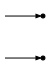

In [58]:
(mcopy(R)^2) ⋅ delete(R)^4 |> display

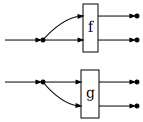

In [59]:
(mcopy(R)^2) ⋅ (f⊗g)⋅delete(R)^4 |> display

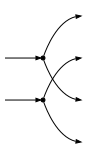

In [60]:
display(mcopy(R^2))

In [61]:
F(mcopy(R^2)).data

2×4 Array{Bool,2}:
 1  0  1  0
 0  1  0  1

In [62]:
compose(otimes(matcopy, matcopy), DirectSumMatrix([1 0 0 0; 0 0 1 0; 0 1 0 0; 0 0 0 1])).data

2×4 Array{Int64,2}:
 1  0  1  0
 0  1  0  1

In [63]:
[1 2] * compose(otimes(matcopy, matcopy), DirectSumMatrix([1 0 0 0; 0 0 1 0; 0 1 0 0; 0 0 0 1])).data

1×4 Array{Int64,2}:
 1  2  1  2

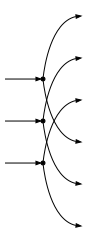

In [64]:
display(mcopy(R^3))

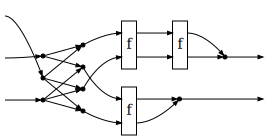

In [65]:
compose(mcopy(R^3),
    mmerge(R)^3,
    otimes(id(R),mcopy(R),id(R)),
    otimes(f, braid(R,R)),
    (f⊗f)⋅mmerge(R)^2) |> display

In [66]:
F(mmerge(R^3))

DirectSumMatrix{Adjoint{Bool,Array{Bool,2}}}(Bool[1 0 0; 0 1 0; … ; 0 1 0; 0 0 1])

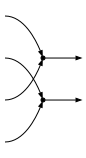

In [67]:
display(mmerge(R^2))

In [68]:
matcopy.data'

2×1 Adjoint{Int64,Array{Int64,2}}:
 1
 1

In [69]:
F(mmerge(R))

DirectSumMatrix{Adjoint{Int64,Array{Int64,2}}}([1; 1])

In [70]:
F(mmerge(R^2)).data

4×2 Adjoint{Bool,Array{Bool,2}}:
 1  0
 0  1
 1  0
 0  1

In [71]:
F(f⋅mmerge(R))

DirectSumMatrix{Array{Int64,2}}([2; 0])

In [72]:
otimes(f,f)⋅otimes(mmerge(R), mmerge(R))

compose(otimes(f,f),otimes(mmerge(\mathbb{R}),mmerge(\mathbb{R})))

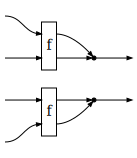

In [73]:
display(otimes(f,f)⋅otimes(mmerge(R), mmerge(R)))

In [74]:
F(otimes(f,f)⋅otimes(mmerge(R), mmerge(R))).data

4×2 Array{Int64,2}:
 2  0
 0  0
 0  2
 0  0

In [75]:
otimes(f,f)⋅mmerge(R^2)

compose(otimes(f,f),mmerge(otimes(\mathbb{R},\mathbb{R})))

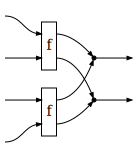

In [76]:
display(otimes(f,f)⋅mmerge(R^2))

In [77]:
F(otimes(f,f)⋅mmerge(R^2)).data

4×2 Array{Int64,2}:
  1  1
 -1  1
  1  1
 -1  1

## Discard / Delete

We need to define images for the delete/codelete and zero/cozero morphisms

In [78]:
matdelete(n) = Matrix{Int}(undef, n, 0)
matcodelete(n) = matdelete(n)'
dim(x::FreeBicategoryRelations.Hom{:delete}) = length(x.args[1].args)
dim(x::FreeBicategoryRelations.Hom{:create}) = length(x.args[1].args)
mat_h = DirectSumMatrix([1 2 -1 3; 0 -5 3 2]')
F(ex) = begin
    d = Dict(f=>matf, g=>matg, h=>mat_h)
    functor((Vector, DirectSumMatrix), ex, generators=d, terms=Dict(
        :mcopy=>x->begin i=length(x.args[1].args); i==1 ? matcopy : matcopier(i); end, 
        :mmerge=>x->begin i=length(x.args[1].args); i==1 ? matcopy' : matcopier(i)'; end,
        :braid=>x->DirectSumMatrix([0 1; 1 0]),
        :id=>x->DirectSumMatrix(Diagonal(ones(x.args[1].args|>length))),
        :delete=>x->DirectSumMatrix(matdelete(dim(x))),
        :create=>x->DirectSumMatrix(matcodelete(dim(x)))
        )
    )
end

F (generic function with 1 method)

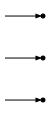

In [79]:
display(delete(R^3))

In [80]:
@test [1 1; 2 3]*matdelete(2) == Matrix{Int}(undef, 2,0)
@test matcodelete(2)*[1 1; 2 3] == Matrix{Int}(undef, 0,2)
@test matcodelete(2)*matdelete(2) == Matrix{Int}(undef, 0,0)

Test Passed

In [81]:
@test F(delete(R^2)).data == matdelete(2)
@test F(create(R^2)).data == matcodelete(2)

Test Passed

In [82]:
@test F(create(R^2)⋅delete(R^2)).data == compose(F(create(R^2)), F(delete(R^2))).data

Test Passed

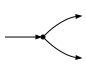

In [83]:
display(mcopy(R))

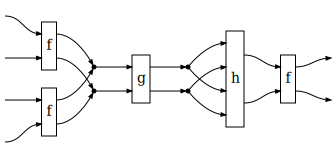

In [84]:
display(otimes(f,f)⋅mmerge(R^2)⋅g⋅(mcopy(R^2))⋅h⋅f)

In [85]:
F(otimes(f,f)⋅mmerge(R^2)⋅g⋅(mcopy(R^2))⋅h⋅f).data

4×2 Array{Int64,2}:
  26  14
 -16  -4
  26  14
 -16  -4

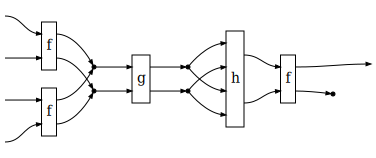

In [86]:
display(otimes(f,f)⋅mmerge(R^2)⋅g⋅(mcopy(R^2))⋅h⋅f⋅(id(R)⊗delete(R)))

In [87]:
F(otimes(f,f)⋅mmerge(R^2)⋅g⋅(mcopy(R^2))⋅h⋅f⋅(id(R)⊗delete(R))).data

4×1 Array{Float64,2}:
  26.0
 -16.0
  26.0
 -16.0

(F(ex)).data = [-34.0; 22.0; -34.0; 22.0]


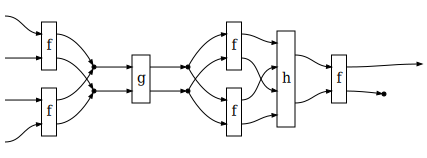

In [88]:
ex = otimes(f,f)⋅mmerge(R^2)⋅g⋅mcopy(R^2)⋅(f⊗f)⋅(id(R)⊗braid(R,R)⊗id(R))⋅h⋅f⋅(id(R)⊗delete(R))
@show F(ex).data
display(ex)

(F(ex′)).data = [42.0; -6.0; 42.0; -6.0]


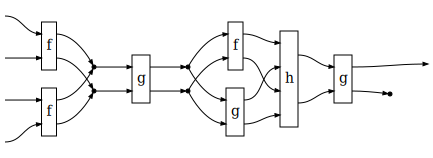

In [89]:
ex′ = otimes(f,f)⋅mmerge(R^2)⋅g⋅mcopy(R^2)⋅(f⊗g)⋅(id(R)⊗braid(R,R)⊗id(R))⋅h⋅g⋅(id(R)⊗delete(R))
@show F(ex′).data
display(ex′)

In [90]:
F(ex⊗ex′).data

8×2 Array{Float64,2}:
 -34.0   0.0
  22.0   0.0
 -34.0   0.0
  22.0   0.0
   0.0  42.0
   0.0  -6.0
   0.0  42.0
   0.0  -6.0

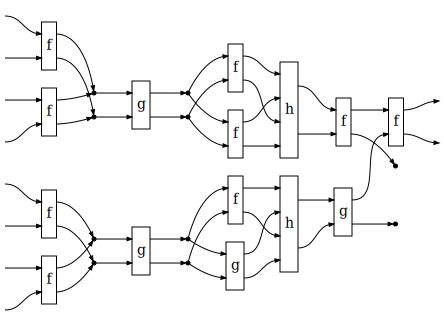

In [91]:
display(otimes(ex,ex′)⋅f)

In [92]:
F(otimes(ex,ex′)⋅f).data

8×2 Array{Float64,2}:
 -34.0  -34.0
  22.0   22.0
 -34.0  -34.0
  22.0   22.0
 -42.0   42.0
   6.0   -6.0
 -42.0   42.0
   6.0   -6.0